# Aim :Prediction of the Region and the Average price of for Avcoada.

### Problem Statement:  
Avocado is a fruit consumed by people heavily in the United States.   
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.   

The avocado, a tree likely originating from south-central Mexico, is classified as a member of the flowering plant family Lauraceae. The fruit of the plant, also called an avocado, is botanically a large berry containing a single large seed.


Some relevant columns in the dataset:

Date - The date of the observation  
AveragePrice - the average price of a single avocado  
type - conventional or organic  
year - the year   
Region - the city or region of the observation  
Total Volume - Total number of avocados sold  
4046 - Total number of avocados with PLU 4046 sold  
4225 - Total number of avocados with PLU 4225 sold  
4770 - Total number of avocados with PLU 4770 sold  

### Importing all the required library 

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading dataset 

In [4]:
data= pd.read_csv("avocado.csv")

In [5]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Data is having 18249 Rows and 14 columns.  
In data info we can see all the columns having 18249 Non- null value, it indicates data is not having any null value.  
In the data  9 columns are Float, 2 columns are int64 and 3 object type.  
Column - Unnamed :0 is used for indexing, which is not relevent, we will drop this in next step.

In [7]:
data.drop(['Unnamed: 0'], axis=1, inplace= True)

In [8]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Now we left with 13 columns. Lets check the Null values present in the data.

In [9]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

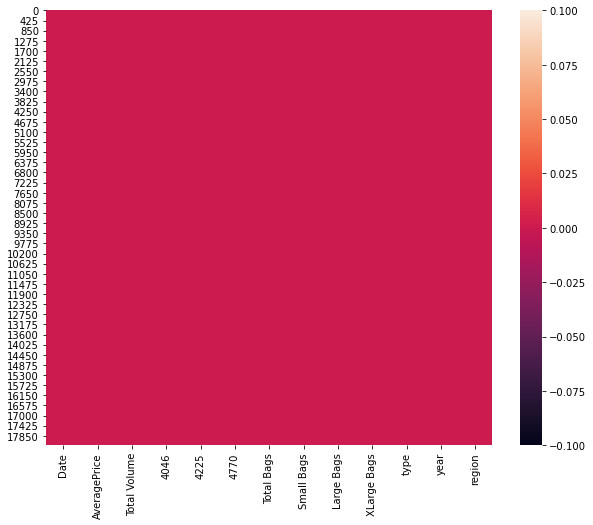

In [10]:
plt.figure(figsize= (10,8))
sns.heatmap(data.isnull())

In [11]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Here we can see Date column is Object type data.  
We need to change it to date type before proceeding further.

In [12]:
data['Date']=pd.to_datetime(data['Date'])
data['Month']=data['Date'].apply(lambda x:x.month)
data['Day']=data['Date'].apply(lambda x:x.day)

Here we have added two more colums with the name of "Month" and "Day"  
lets check how our data looks like.

In [13]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [14]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head()

,type,region
0,conventional,Albany
1,conventional,Albany
2,conventional,Albany
3,conventional,Albany
4,conventional,Albany


In [15]:
numerical_features= data.select_dtypes(include=[np.number])
numerical_features.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


In [16]:
for col in categorial_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())
    print('*'*20)


type column: 
conventional    9126
organic         9123
Name: type, dtype: int64
********************

region column: 
DallasFtWorth          338
SanDiego               338
PhoenixTucson          338
Pittsburgh             338
Southeast              338
RaleighGreensboro      338
StLouis                338
RichmondNorfolk        338
Boise                  338
Spokane                338
SouthCentral           338
Tampa                  338
Northeast              338
BuffaloRochester       338
Roanoke                338
Syracuse               338
Portland               338
Chicago                338
NewYork                338
BaltimoreWashington    338
Philadelphia           338
Orlando                338
NewOrleansMobile       338
NorthernNewEngland     338
LosAngeles             338
TotalUS                338
GrandRapids            338
California             338
CincinnatiDayton       338
Atlanta                338
Columbus               338
Seattle                338
West            

# Univariate Analysis

<AxesSubplot:xlabel='type', ylabel='count'>

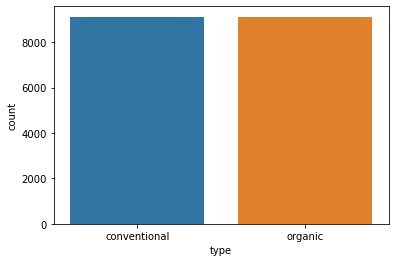

In [17]:
sns.countplot(data['type'])

Here we can organic and conventional both are almost equal in numbers.

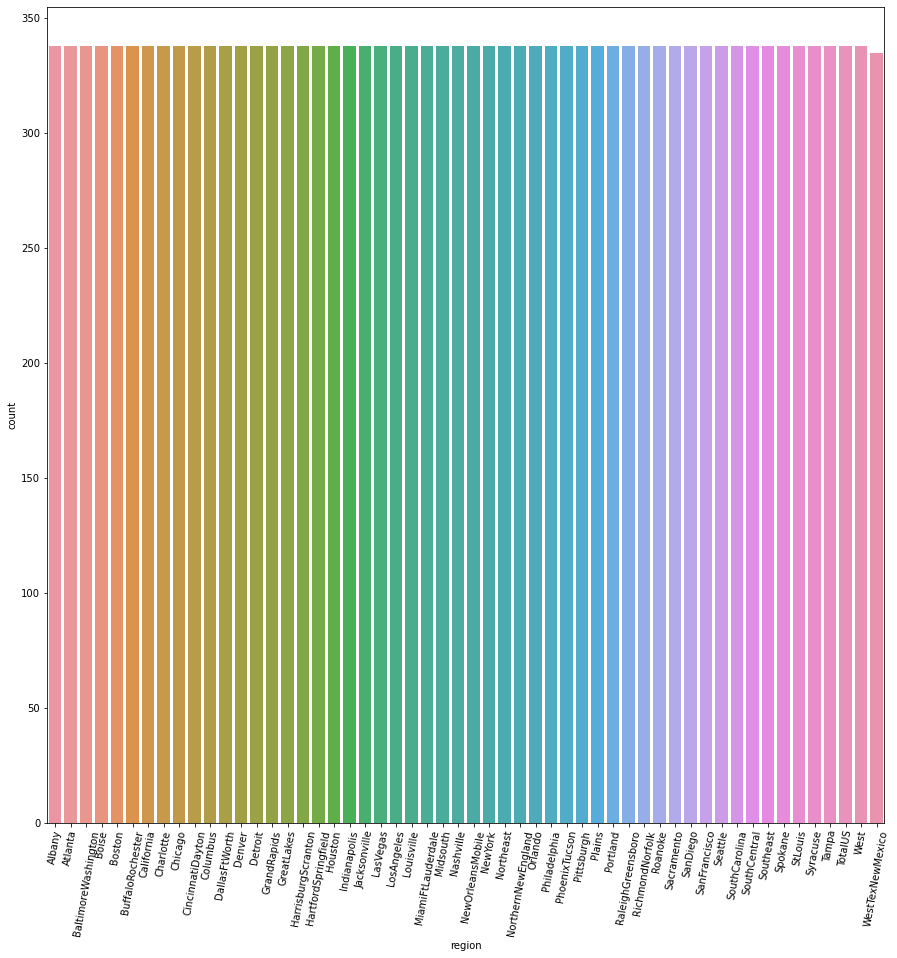

In [18]:
plt.figure(figsize= (15,15))
sns.countplot(data['region'])
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

We can see that all the regions are equal in numbers, only WestTexNewMexico having values 335.

In [19]:
data.describe().round(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15,6.18,15.66
std,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94,3.53,8.78
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00,1.00,1.00
25%,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00,3.00,8.00
50%,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00,6.00,16.00
75%,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00,9.00,23.00
max,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00,12.00,31.00


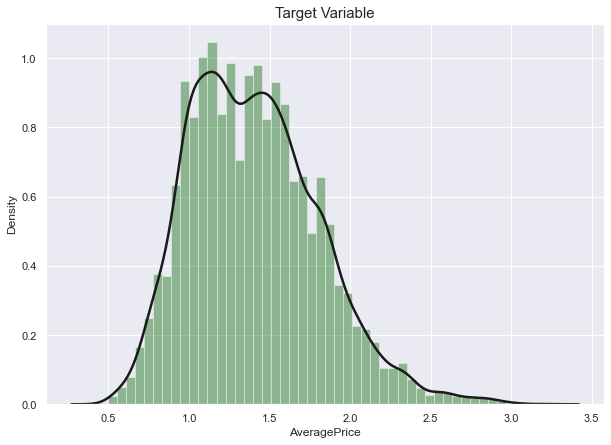

In [20]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,7))
sns.distplot(data['AveragePrice'], color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
plt.title('Target Variable', fontsize=15)
plt.show()

Average price is distributed between 0.44 to 3.25.  
Here minmum average price is 0.44 and Maximum Average Price= 3.25 
Data is having most of its density in the range 1.0 to 2.0 

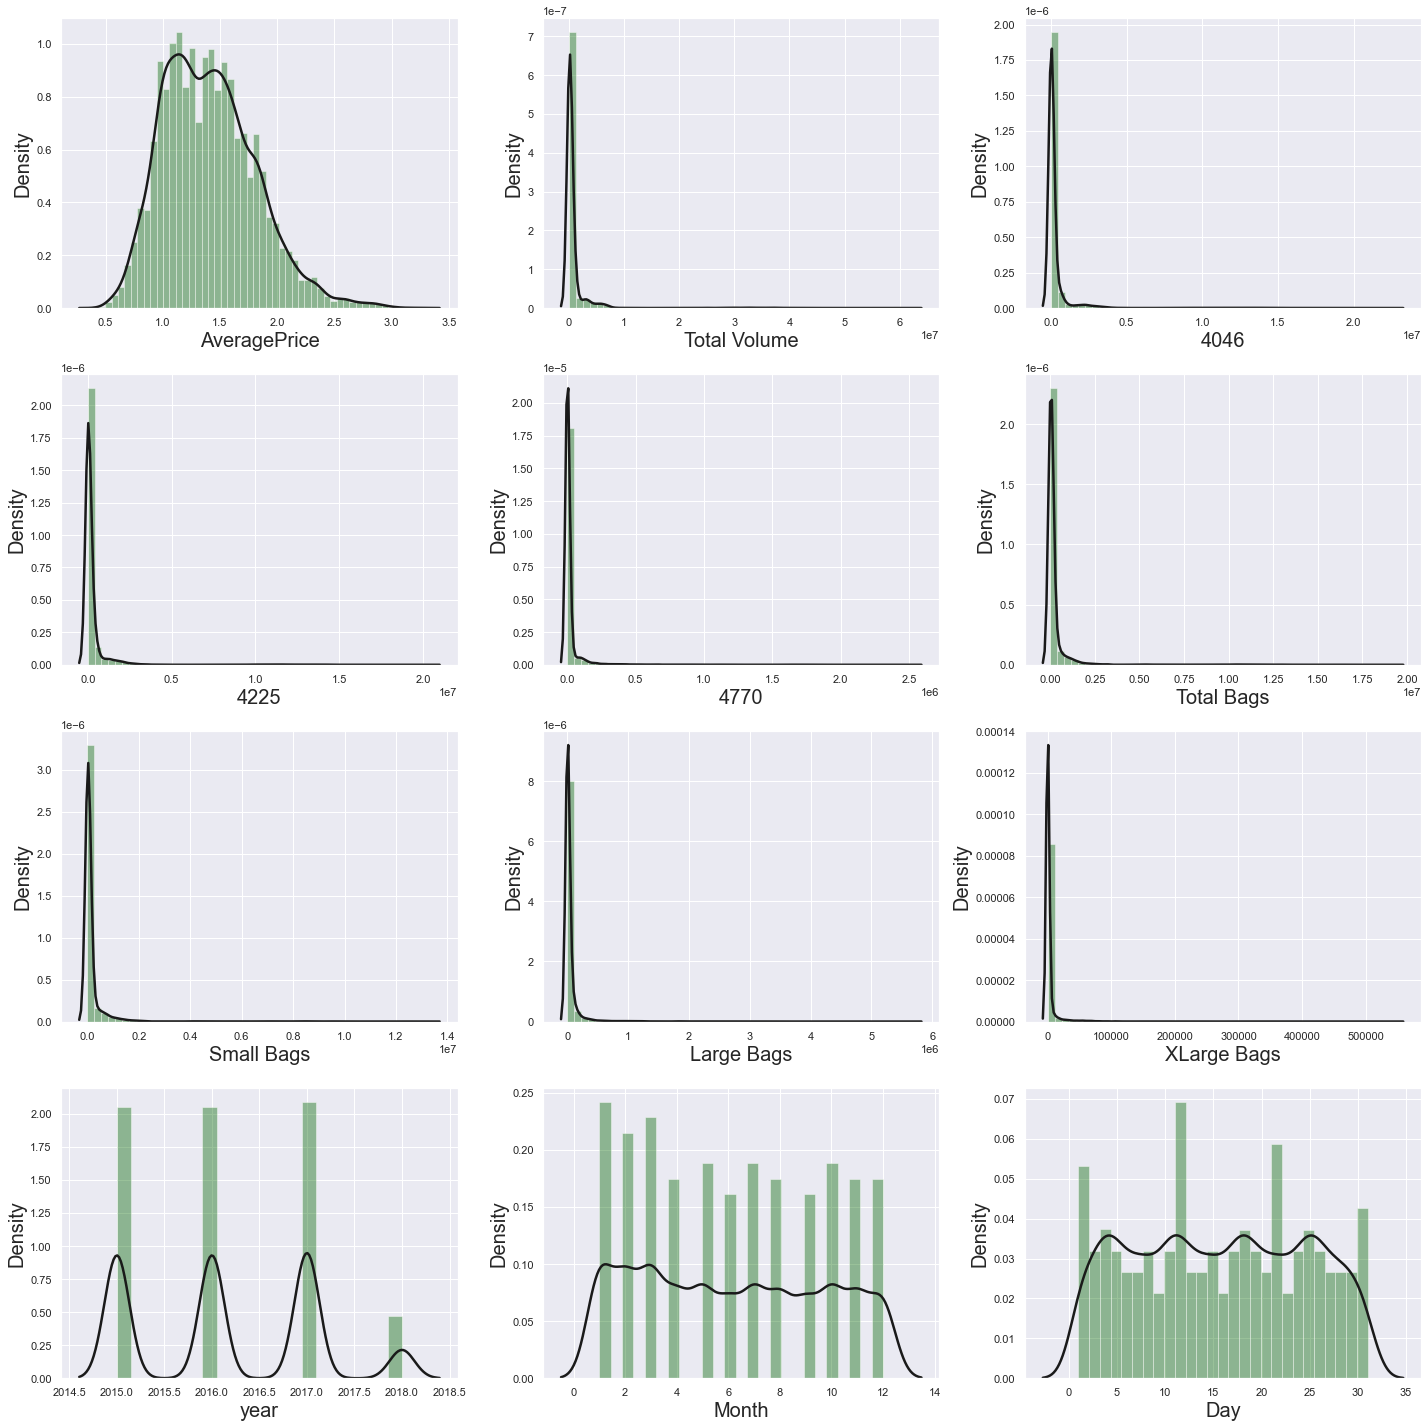

In [21]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber= 1

for column in numerical_features:
    if plotnumber<=14:
        ax= plt.subplot(4,3, plotnumber)
        sns.distplot(numerical_features[column],color='darkgreen',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Density', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

Here we can observe that only Average price is normaly distributed and having very less skewness in the data.  

All other columns are not having good distribution, there is skewness present in the data.  

We will treat the data for skewness using traonform avalable like  power_transform, sqrt_transform and log_transform.

# Bivariate Analysis 

Lets analyse the data using Relational plots available in Seaborn like Scatterplot, relplot  and lineplot.  
we will analyse with respect to Target column as wel as within the feature columns to check the relationship between feature columns. 

In [22]:
data.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20


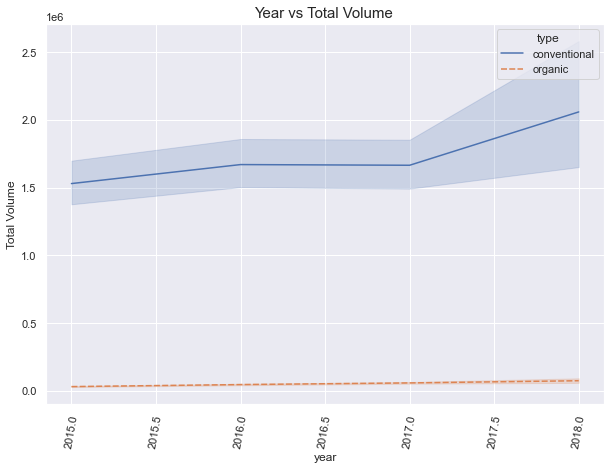

In [23]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='year',y='Total Volume', hue= 'type', style='type')
locs, labels = plt.xticks()
plt.title('Year vs Total Volume ', fontsize=15)
plt.setp(labels, rotation=80)
plt.show()

Here we can see the plot for volume over diffrent years, with respect to type of the avocado.  
We can say that the demand for conventional avocado is more as compared to organic avacado.  
Here this diffrence could be due to price diffrence, lets analyse with Average price.

Text(0.5, 1.0, 'Average Price vs Total Volume ')

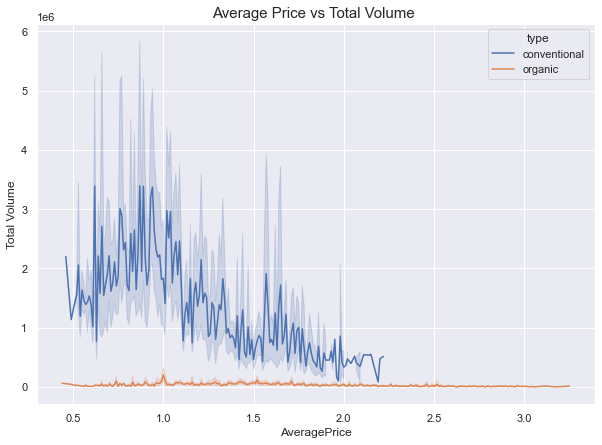

In [24]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='AveragePrice',y='Total Volume', hue= 'type')
plt.title('Average Price vs Total Volume ', fontsize=15)

Here we can see price range for organic product is high as compared to Conventional products.  
This show that due to high cost organic producr are having lower demand and compared to conventional Avocado.

Lets check the price distribution over the months.

Text(0.5, 1.0, 'Average Price vs Month ')

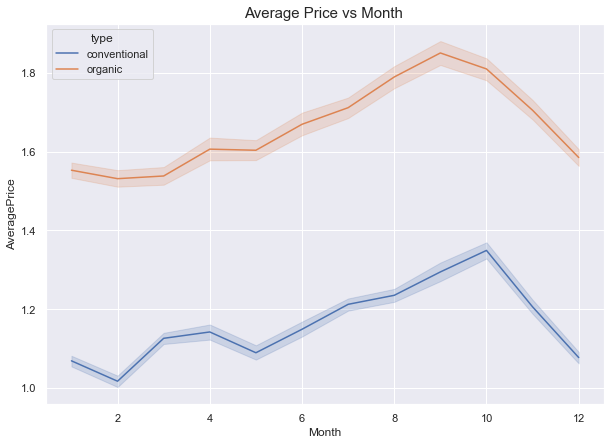

In [25]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data, x='Month',y='AveragePrice', hue= 'type')
plt.title('Average Price vs Month ', fontsize=15)

Here we can interpret that the price varying in every months.  
Price for convetional as well as for organic are higer between 8th to 10th of the month.  
Price are lower in the 2nd month of the year.

Lets check the volume in diffrent region.

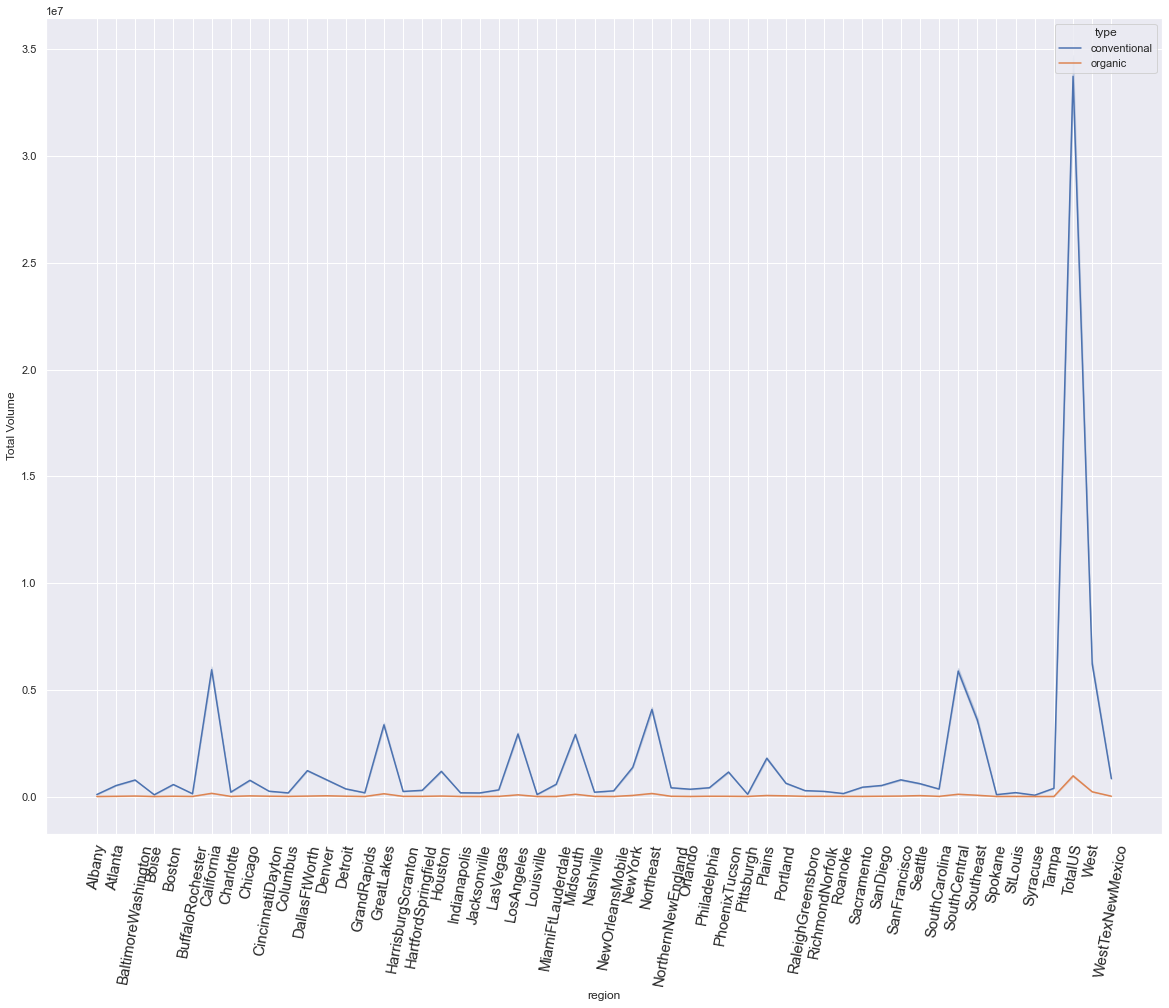

In [26]:
plt.figure(figsize=(20,15))
sns.lineplot(data=data, x='region',y='Total Volume', hue= 'type')
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

Here we can interpret TotalUS and West region having higher volume.  

lets Identify top 5 regions with Average price

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

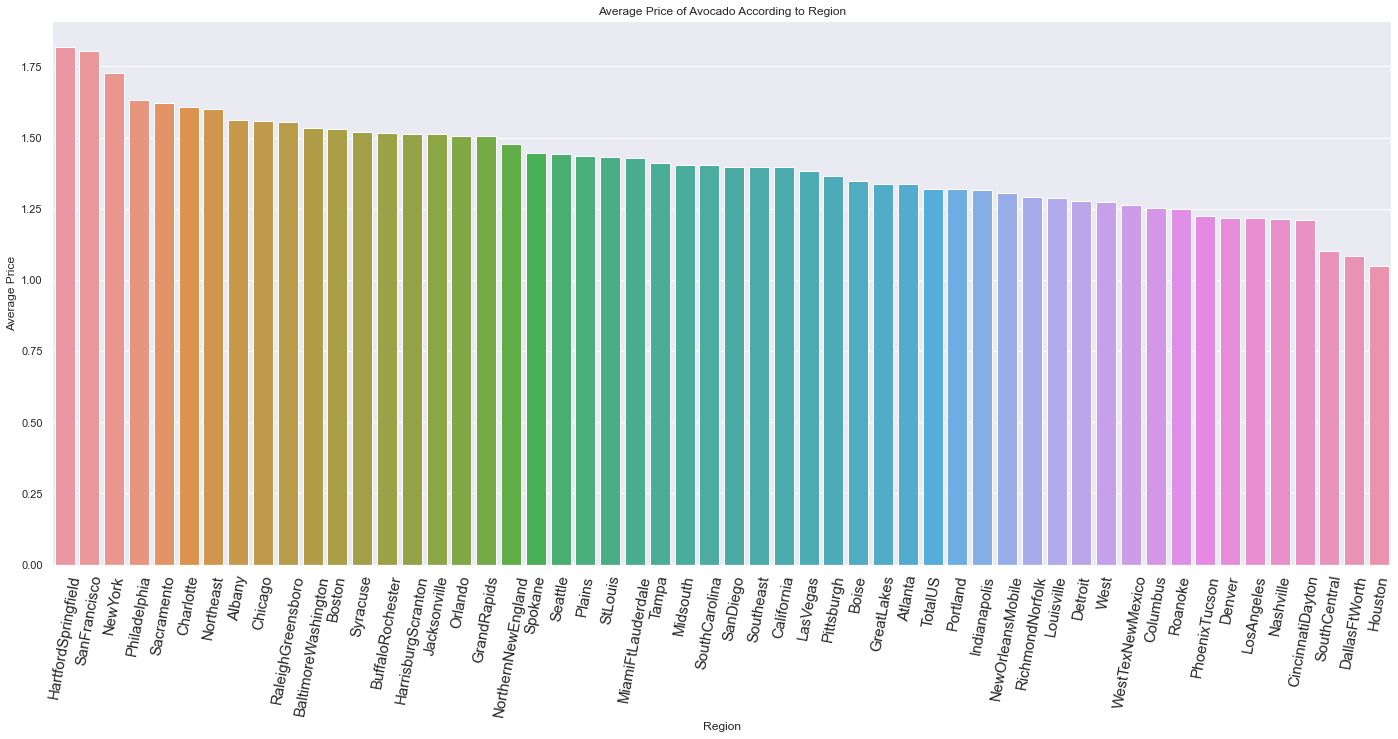

In [27]:
region_list=list(data.region.unique())
average_price=[]

for i in region_list:
    x=data[data.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=80, fontsize = 15)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Here we can see the top ten regions data compared to price.  
HartfordSpringfiels, SanFrancisco, Newyork, Philadelphia and Sacramento are the top 5 in the regin list.

Here we are checking Average Price distribution over the years.

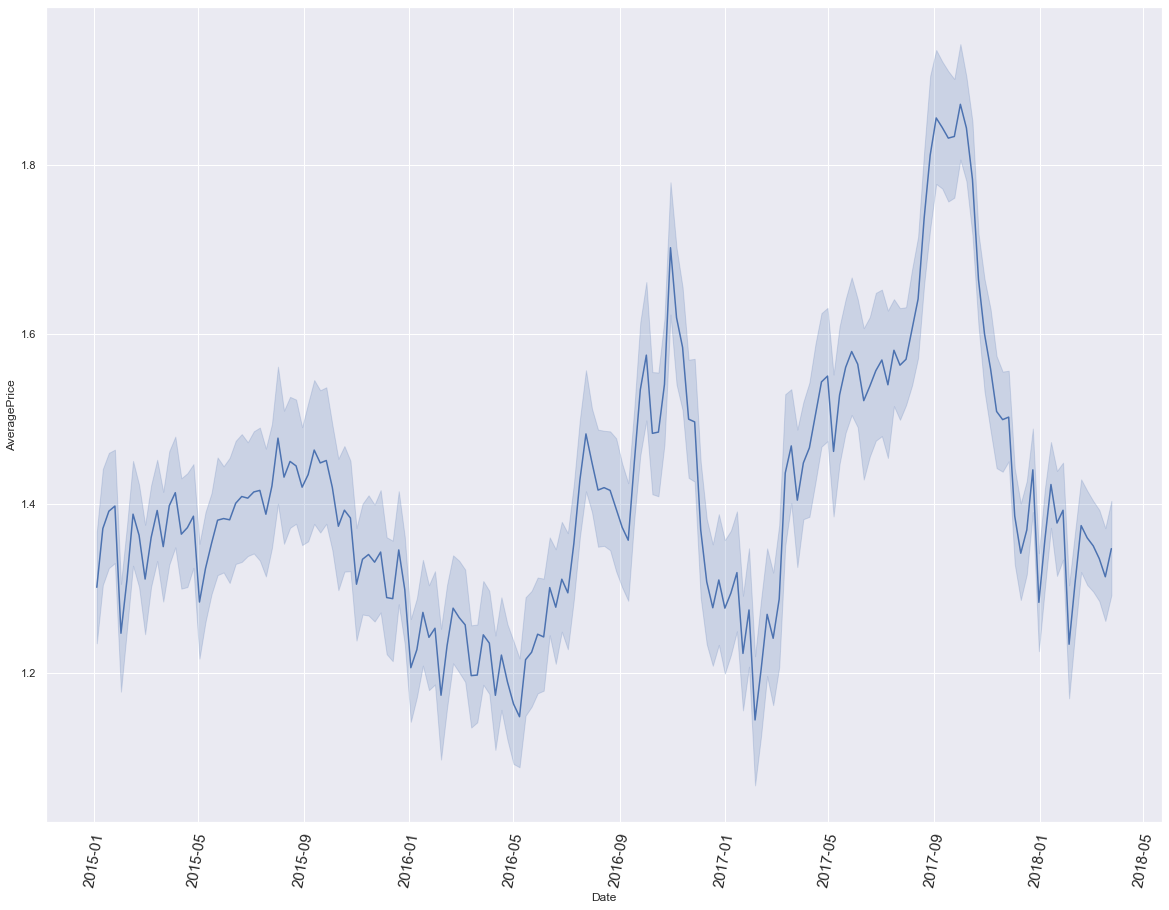

In [28]:
plt.figure(figsize=(20,15))
sns.lineplot(data=data, x='Date',y='AveragePrice')
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

Here we can see the average price high in 2017-9- 2017-11

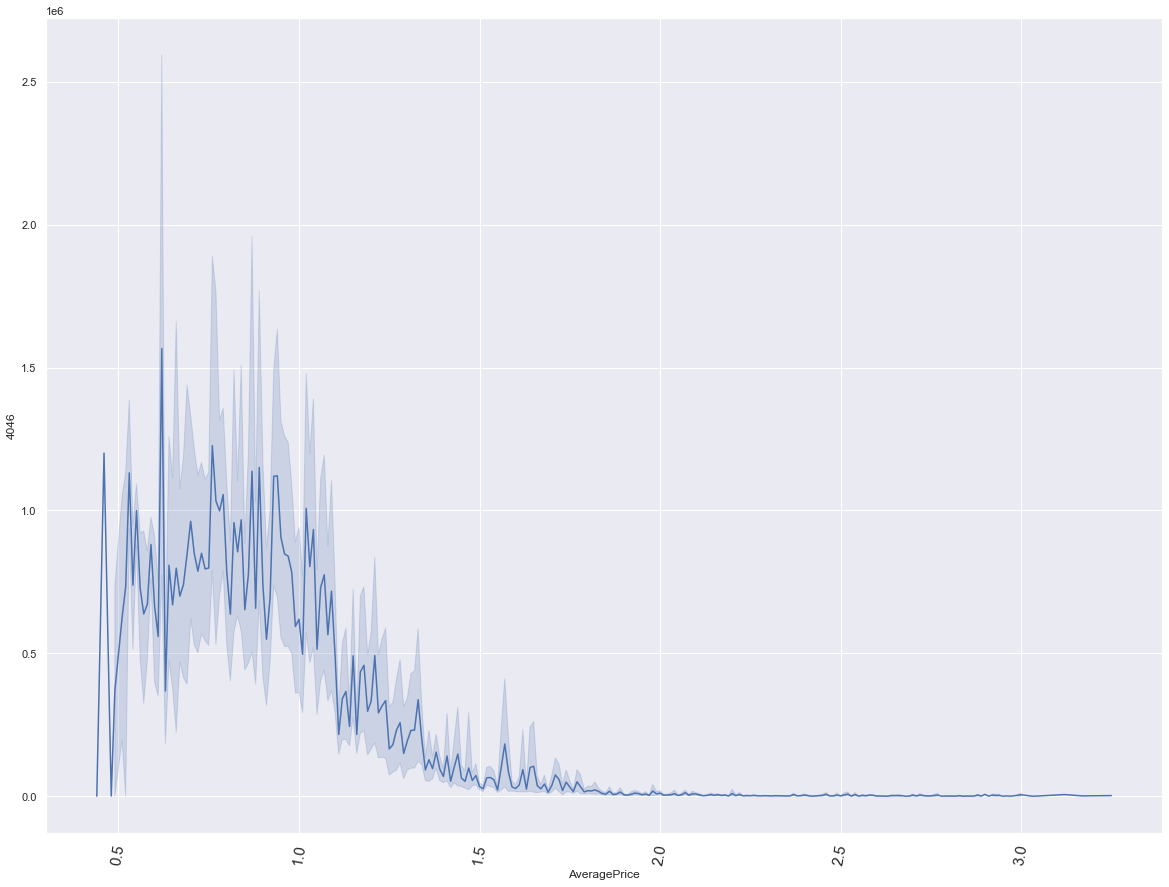

In [29]:
plt.figure(figsize=(20,15))
sns.lineplot(data=data, x='AveragePrice',y='4046')
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

Lets drop Drop Date column first before proceding further as we already having month and year columns seperatly.

In [30]:
data.drop(['Date'], axis= 1 , inplace = True)
data.drop(['XLarge Bags'], axis= 1 , inplace = True)

In [31]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,conventional,2015,Albany,11,29


Here we left with only 13 columns. lets check pair plot to see the relation of columns with each other.

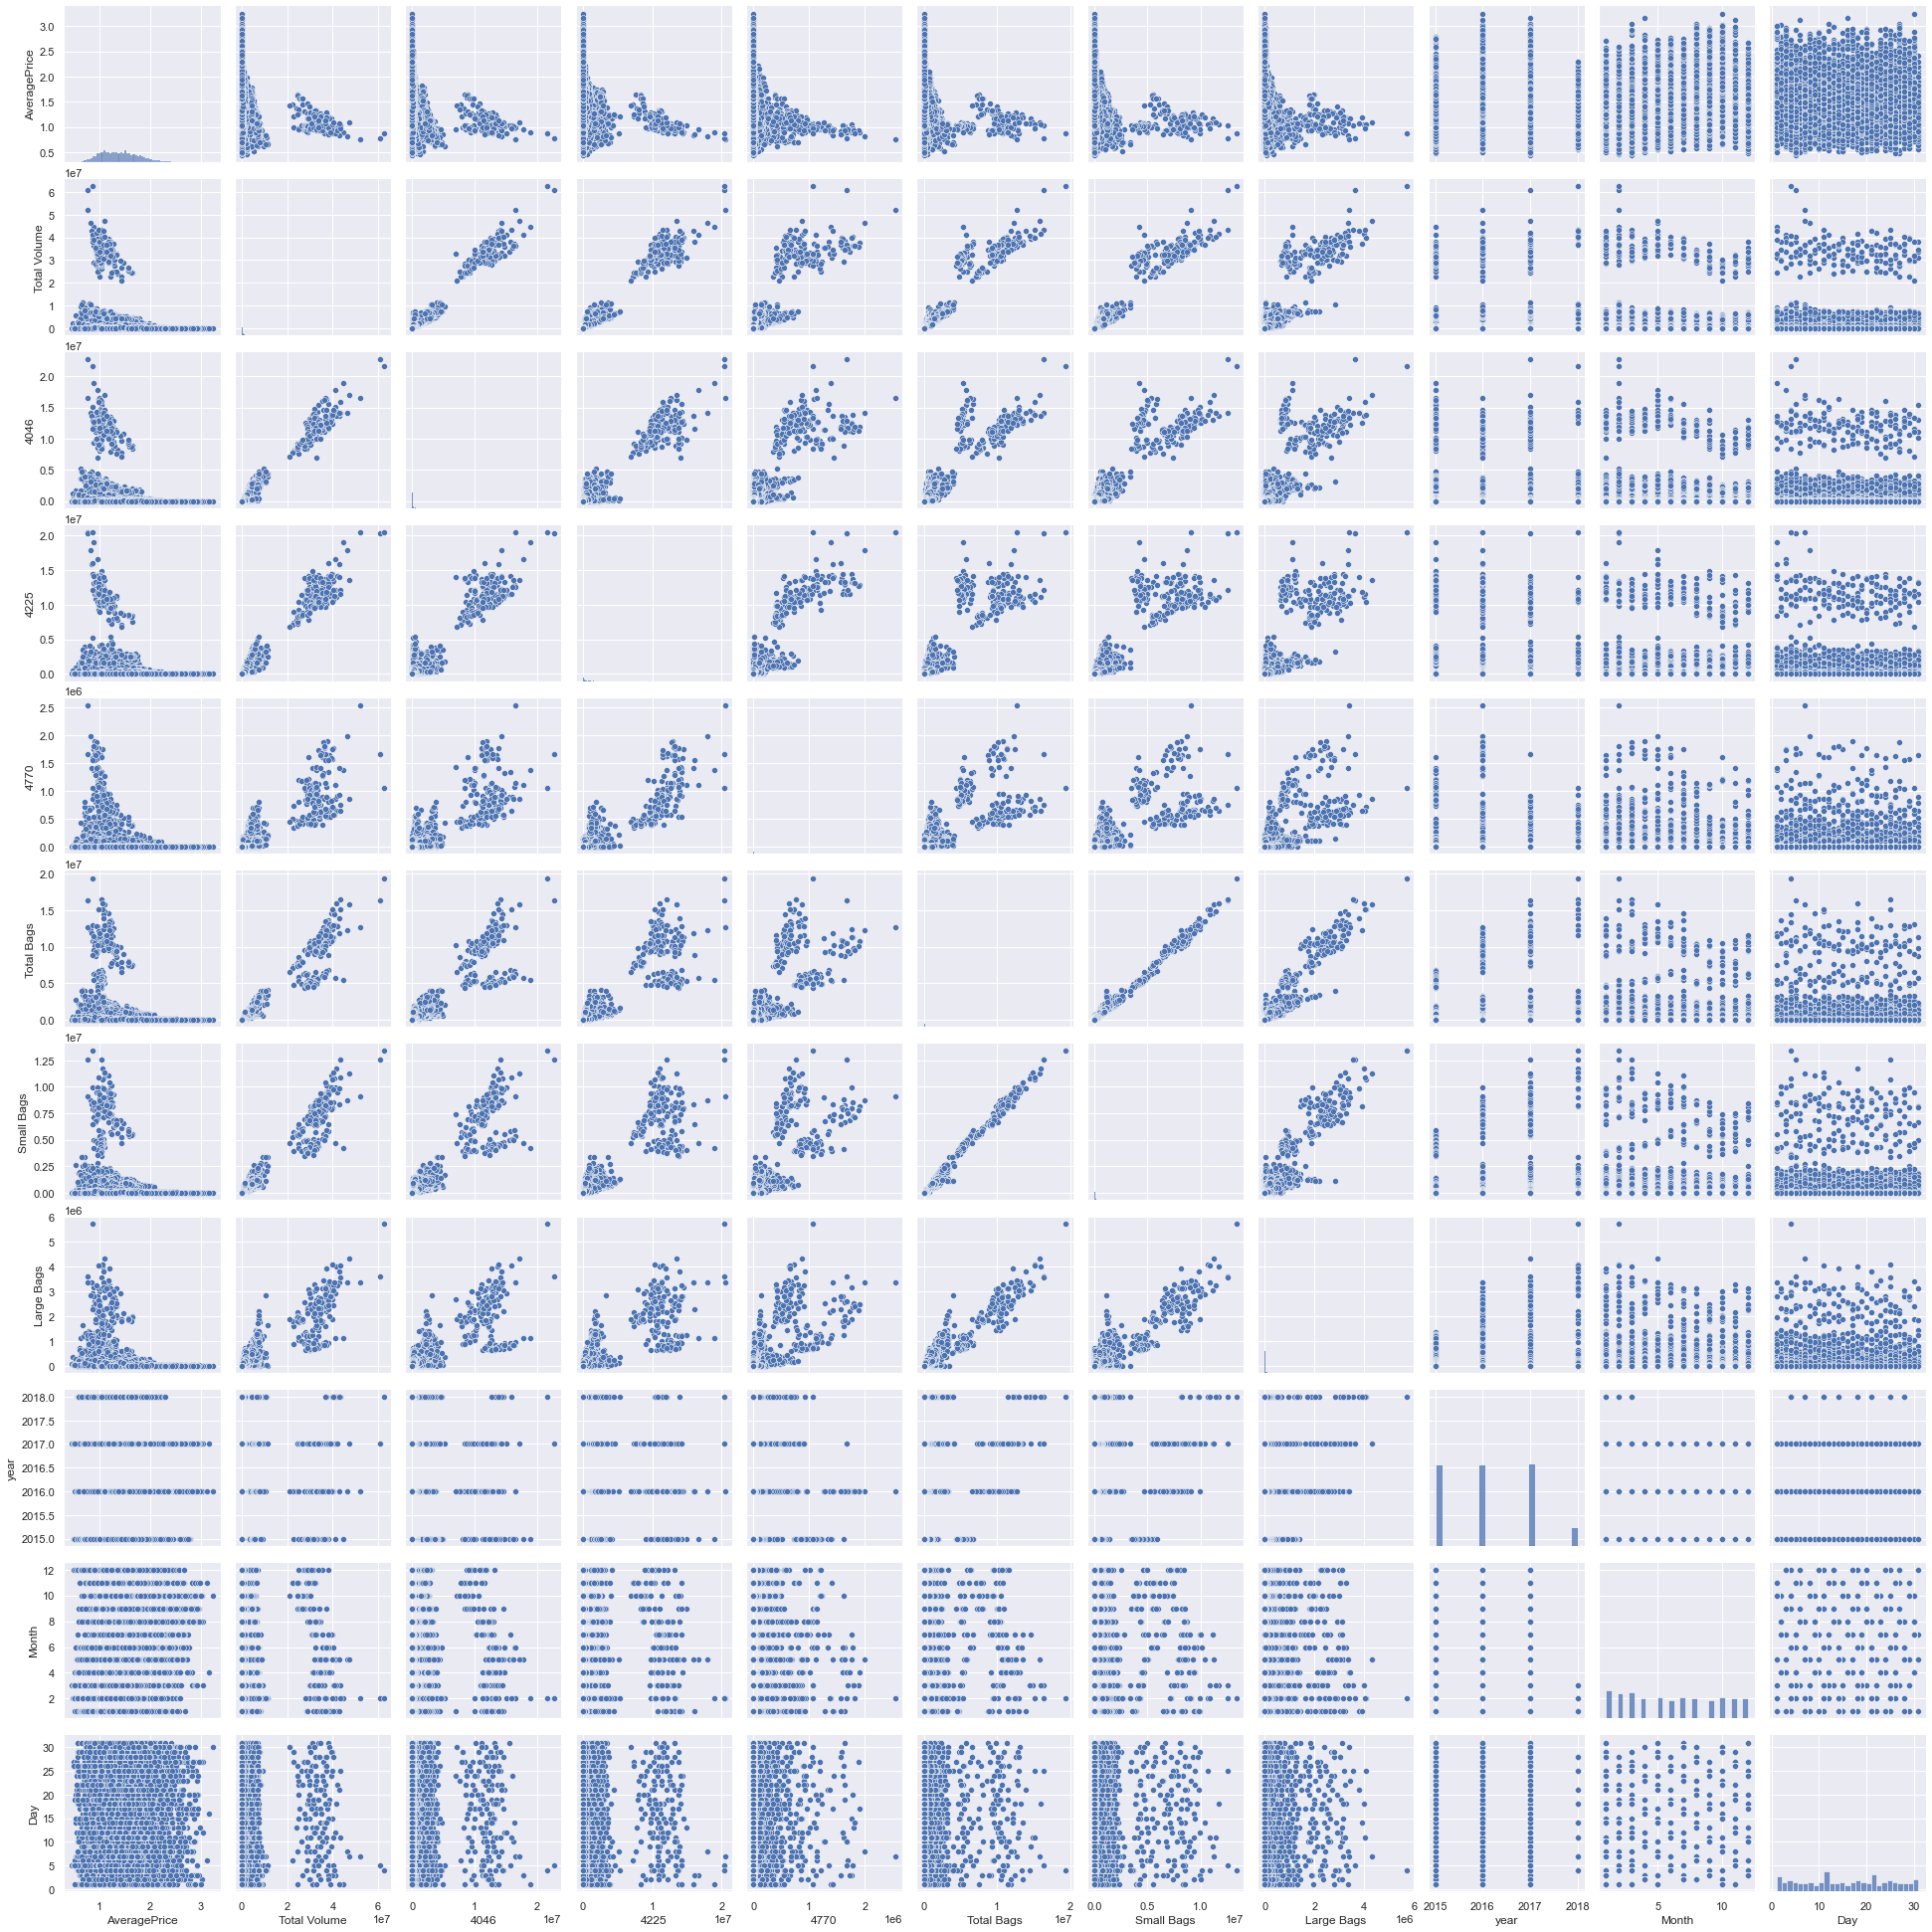

In [32]:
sns.pairplot(data)

From pair plot we can predict that data is having multicolinearity,  
we will check multicolinearity using VIF later in the project.

## Data Preprocessing 

In [33]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

data['type'] = le.fit_transform(data['type'])
data['region'] = le.fit_transform(data['region'])

In [34]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0,2015,0,11,29


In [35]:
data.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [36]:
data.type.unique()

array([0, 1])

Here we can see we have 53 unique values for region and 2 unique values for type.  
Lets check the correlation for the data.

In [37]:
data.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'}, inplace=True)

In [38]:
data.corr()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,0.615845,0.093197,-0.011716,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,-0.232434,0.017193,0.174176,-0.024689,-0.009747
PLU_4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,-0.225819,0.003353,0.192073,-0.025803,-0.010159
PLU_4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,-0.232289,-0.009559,0.145726,-0.022108,-0.012393
PLU_4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,-0.210027,-0.036531,0.095252,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,-0.217788,0.071552,0.175256,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,-0.220535,0.063915,0.164702,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,-0.193177,0.087891,0.198768,-0.020187,-0.008352
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,1.000000,-0.000032,-0.000280,-0.000085,-0.000013
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,-0.000032,1.000000,-0.000055,-0.177050,0.004475


<AxesSubplot:>

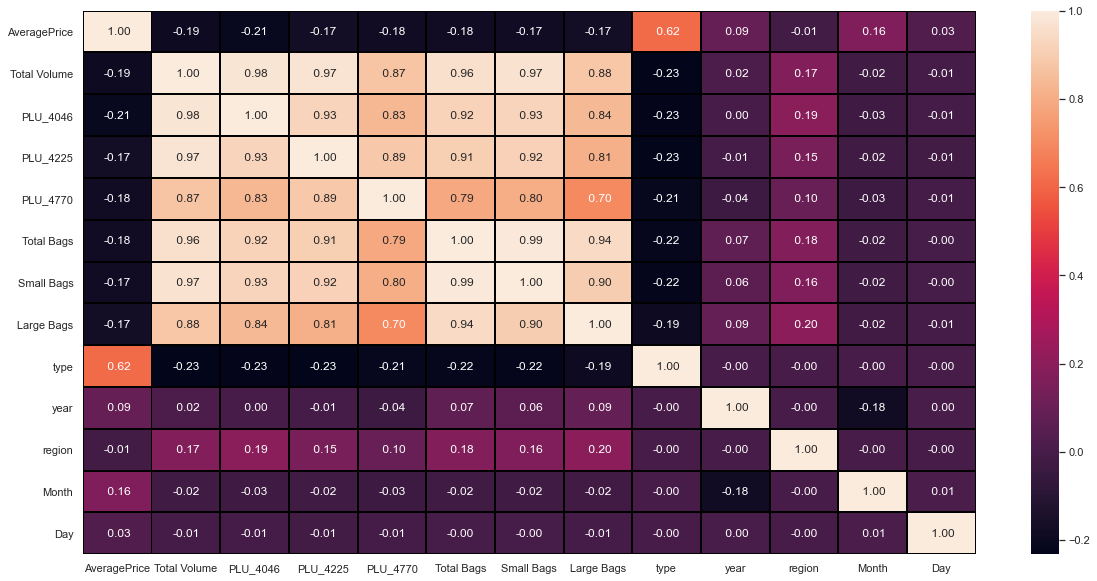

In [39]:
plt.figure(figsize=(20,10))

sns.heatmap(data.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

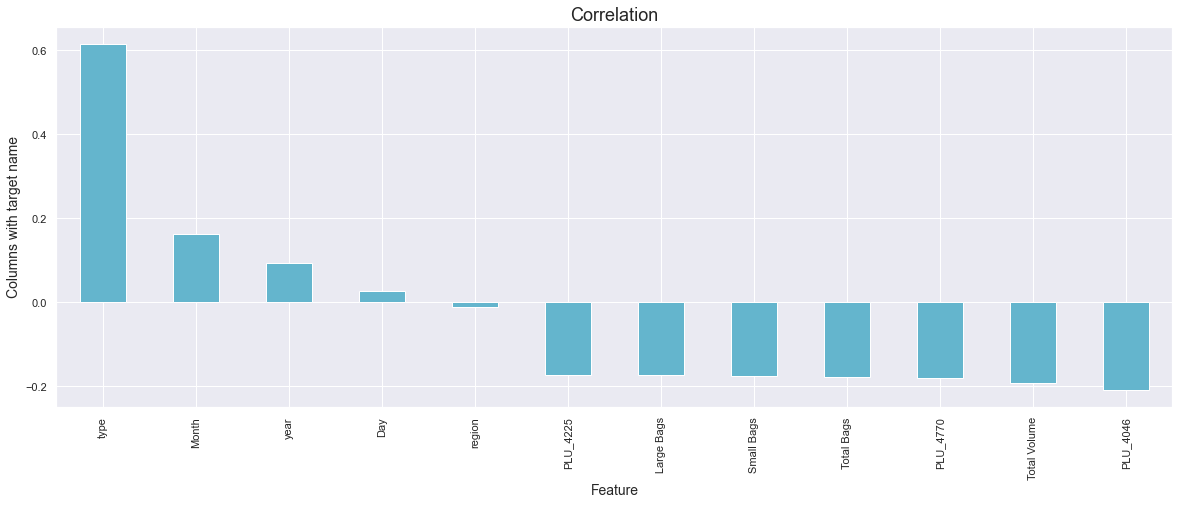

In [40]:
plt.figure(figsize=(20,7))
data.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Here type , Month , year and day,are having positive correlation with the Target column,  
The columns below 0.0 level are having negative correlation with the Target column.   
Some of the negatively correlated coloums are positive correlated, with each other.  

AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags and  XLarge Bags columns are having oulires.

# Skewness 

Lets check the Skewness present in the data.

In [41]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
PLU_4046         8.648220
PLU_4225         8.942466
PLU_4770        10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Day              0.014310
dtype: float64

Data is highly skewed, values between -0.5 to 0.5 are acceptable.  
We can see below data is having values > 0.5 ,  

Total Volume---     9.007687  
4046 ---            8.648220  
4225 ---            8.942466   
4770 ---        10.159396    
Total Bags ---      9.756072  
Small Bags ---      9.540660   
Large Bags ---     9.796455   
XLarge Bags ---    13.139751  

### Removing outliers 

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(data))
threshold= 3 
print(np.where(z>3))

(array([  346,   359,   783, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 4, ..., 0, 0, 0], dtype=int64))


In [43]:
df=data[(z<3).all(axis=1)]
print(data.shape)
print(df.shape)

(18249, 13)
(17736, 13)


In [44]:
Loss_percentage=(18249-17651)/18249*100
print(Loss_percentage)

3.276891884486821


As loss percentage is less than 10 percent, we can use new df.

## Removing Skweness

In [45]:
from sklearn.preprocessing import power_transform 

# Divide the data into features and vectors.

x=df.iloc[:,1:]
y=df.iloc[:,0]

x=power_transform(x, method='yeo-johnson')

In [46]:
X=pd.DataFrame(data=x)

In [47]:
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.082125,-0.661342,0.341682,-0.230284,-0.540343,-0.351015,-0.785026,-1.014082,-1.213858,-2.011310,1.492823,1.228160
1,-0.153857,-0.780622,0.260348,-0.183133,-0.501178,-0.315195,-0.775093,-1.014082,-1.213858,-2.011310,1.492823,0.538376
2,0.196850,-0.735395,0.637321,0.015261,-0.569056,-0.377845,-0.762445,-1.014082,-1.213858,-2.011310,1.492823,-0.219234
3,0.012244,-0.636619,0.458186,-0.129287,-0.715095,-0.513452,-0.703173,-1.014082,-1.213858,-2.011310,1.492823,-1.095063
4,-0.186838,-0.688313,0.253013,-0.118655,-0.688447,-0.493126,-0.611277,-1.014082,-1.213858,-2.011310,1.277397,1.416090
...,...,...,...,...,...,...,...,...,...,...,...,...
17731,-0.681948,-0.466869,-0.928891,-1.231409,-0.344442,-0.180765,-0.417082,0.986114,1.972631,1.577452,-1.219567,-1.385482
17732,-0.774712,-0.622108,-0.674433,-1.231409,-0.512500,-0.335683,-0.489510,0.986114,1.972631,1.577452,-1.641423,1.322571
17733,-0.778646,-0.622056,-0.782288,0.435762,-0.506386,-0.317609,-0.954257,0.986114,1.972631,1.577452,-1.641423,0.640404
17734,-0.705440,-0.551415,-0.720014,0.435451,-0.437597,-0.254775,-0.919655,0.986114,1.972631,1.577452,-1.641423,-0.105516


In [48]:
X.skew()

0    -0.007418
1    -0.038752
2    -0.044355
3     0.023088
4    -0.020681
5    -0.022020
6    -0.110487
7    -0.027971
8     0.223316
9    -0.256886
10   -0.146057
11   -0.208742
dtype: float64

We can see, skewness removed from data.

## Scaling the data Using StandardScaler.

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
SDc=StandardScaler()
X1=SDc.fit_transform(X)

In [51]:
X1

array([[-0.08212475, -0.66134222,  0.34168237, ..., -2.01130976,
         1.49282267,  1.22816014],
       [-0.15385747, -0.78062168,  0.26034817, ..., -2.01130976,
         1.49282267,  0.53837555],
       [ 0.1968502 , -0.73539517,  0.63732149, ..., -2.01130976,
         1.49282267, -0.21923403],
       ...,
       [-0.77864587, -0.62205602, -0.78228767, ...,  1.57745177,
        -1.64142318,  0.64040416],
       [-0.70544003, -0.55141537, -0.72001412, ...,  1.57745177,
        -1.64142318, -0.10551641],
       [-0.67115773, -0.36498444, -0.79499549, ...,  1.57745177,
        -1.64142318, -0.95869222]])

Our data is now scaled, in next step we will check multicollinearity.

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
column=['Total Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770','Total Bags', 'Small Bags', 'Large Bags', 'type', 'year', 'region','Month', 'Day']
X2=pd.DataFrame(data=X1, columns=column)

In [54]:
X2

,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,type,year,region,Month,Day
0,-0.082125,-0.661342,0.341682,-0.230284,-0.540343,-0.351015,-0.785026,-1.014082,-1.213808,-2.011310,1.492823,1.228160
1,-0.153857,-0.780622,0.260348,-0.183133,-0.501178,-0.315195,-0.775093,-1.014082,-1.213808,-2.011310,1.492823,0.538376
2,0.196850,-0.735395,0.637321,0.015261,-0.569056,-0.377845,-0.762445,-1.014082,-1.213808,-2.011310,1.492823,-0.219234
3,0.012244,-0.636619,0.458186,-0.129287,-0.715095,-0.513452,-0.703173,-1.014082,-1.213808,-2.011310,1.492823,-1.095063
4,-0.186838,-0.688313,0.253013,-0.118655,-0.688447,-0.493126,-0.611277,-1.014082,-1.213808,-2.011310,1.277397,1.416090
...,...,...,...,...,...,...,...,...,...,...,...,...
17731,-0.681948,-0.466869,-0.928891,-1.231409,-0.344442,-0.180765,-0.417082,0.986114,1.972682,1.577452,-1.219567,-1.385482
17732,-0.774712,-0.622108,-0.674433,-1.231409,-0.512500,-0.335683,-0.489510,0.986114,1.972682,1.577452,-1.641423,1.322571
17733,-0.778646,-0.622056,-0.782288,0.435762,-0.506386,-0.317609,-0.954257,0.986114,1.972682,1.577452,-1.641423,0.640404
17734,-0.705440,-0.551415,-0.720014,0.435451,-0.437597,-0.254775,-0.919655,0.986114,1.972682,1.577452,-1.641423,-0.105516


In [55]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [56]:
calc_vif(X2)

,variables,VIF FACTOR
0,Total Volume,53.700455
1,PLU_4046,7.205741
2,PLU_4225,11.382600
3,PLU_4770,3.929781
4,Total Bags,35.093241
5,Small Bags,16.674277
6,Large Bags,3.438720
7,type,3.359388
8,year,1.350820
9,region,1.081590


We can see Total Volume , Total , Bags , small bag , high values of VIF , we can drop these columns or we an use PCA.  
lets Try PCA

In [57]:
from sklearn.decomposition import PCA

pca=PCA(n_components=10)

Xpca=pca.fit_transform(X2)

In [58]:
X3=Xpca

In [59]:
x=pd.DataFrame(data=X3)

In [60]:
calc_vif(x)

,variables,VIF FACTOR
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0
7,7,1.0
8,8,1.0
9,9,1.0


In [61]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# 1.LinearRegression

In [62]:
lr=LinearRegression()
for i in range(0, 100):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.25)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    print(f"At Random Stat {i}, the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"At Random Stat {i}, the testing accuracy is:{r2_score(y_test,pred_test)}")
    print("\n")

At Random Stat 0, the training accuracy is:0.5244457791636113
At Random Stat 0, the testing accuracy is:0.5216669457655116


At Random Stat 1, the training accuracy is:0.5222837759457517
At Random Stat 1, the testing accuracy is:0.5284979332022561


At Random Stat 2, the training accuracy is:0.5246942943550001
At Random Stat 2, the testing accuracy is:0.5204046700441064


At Random Stat 3, the training accuracy is:0.5229553123013992
At Random Stat 3, the testing accuracy is:0.526350007327548


At Random Stat 4, the training accuracy is:0.5235394631488013
At Random Stat 4, the testing accuracy is:0.5240331944213552


At Random Stat 5, the training accuracy is:0.5261092970108465
At Random Stat 5, the testing accuracy is:0.5170290036260292


At Random Stat 6, the training accuracy is:0.5207150235734833
At Random Stat 6, the testing accuracy is:0.5328435074548192


At Random Stat 7, the training accuracy is:0.5220677711407818
At Random Stat 7, the testing accuracy is:0.5290185238295819


A

At Random Stat 67, the training accuracy is:0.5238
At Random Stat 67, the testing accuracy is:0.5237
At random stat 67 training and testing are almost equal, we will proceed further with this.

In [63]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y, test_size=0.25, random_state= 67)

In [76]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print('Linear model accuracy is: ',r2_score(y_test_b,pred_test))

Linear model accuracy is:  0.5237733004163234


Lets check model for cross validation

# Cross Validation of Model 

In [65]:
test_accuracy= r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is -224658.4239390093 and Accuracy score is 52.37733004163234
At cross fold 3 the Cross Val score is 2.0037473220789526 and Accuracy score is 52.37733004163234
At cross fold 4 the Cross Val score is 0.3947673409828101 and Accuracy score is 52.37733004163234
At cross fold 5 the Cross Val score is 10.537652263136303 and Accuracy score is 52.37733004163234
At cross fold 6 the Cross Val score is 2.8566005071751 and Accuracy score is 52.37733004163234
At cross fold 7 the Cross Val score is 5.264941123191656 and Accuracy score is 52.37733004163234
At cross fold 8 the Cross Val score is 5.2988518335922885 and Accuracy score is 52.37733004163234
At cross fold 9 the Cross Val score is 9.559410176357797 and Accuracy score is 52.37733004163234


At cross fold 5 the Cross Val score is 10.537652263136303 and Accuracy score is 52.37733004163234

In [66]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test_b,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,pred_test)))

Error:
Mean Absolute Error: 0.20865421488227592
Mean Squared Error: 0.07032782923716972
Root Mean Square Error: 0.26519394645649386


We can see cv score is very low, But ist is having less diffrence with respect to other cv.  
So we can take cv=5, 
But model performance is low, lets try anaother model.


## 2. Lasso

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state': list(range(0,10)), 'selection':['cyclic', 'random'], 'max_iter':[500,1000,1200,1500,2000]}
ls=Lasso()
clf=GridSearchCV(ls, parameters)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'alpha': 0.0001, 'max_iter': 500, 'random_state': 8, 'selection': 'random'}


In [67]:
ls=Lasso(alpha=0.0001,max_iter=500, random_state=8, selection='random')
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=5,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: 52.37742078405654
Cross val Score : 10.568823028446426


In [68]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 0.20864800617050025
Mean Squared Error: 0.07032769523129145
Root Mean Square Error: 0.26519369380000624


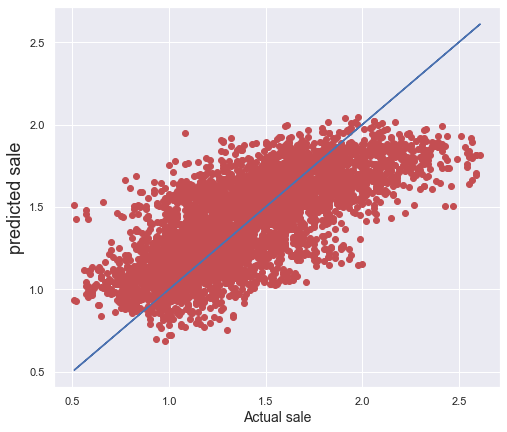

In [69]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

There is huge diffrence in CV score, and R2 score, Model performance not improved with Lasso,  
Lets try Ridge.

## 3. Ridge

In [70]:
parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'fit_intercept': [True,False], 'normalize':[True, False], 'copy_X': [True , False], 'tol':[0.0001,0.001,0.01,0.1,1,10]}
rd=Ridge()
rdclf=GridSearchCV(rd, parameters)
rdclf.fit(x_train_b, y_train_b)
print(rdclf.best_params_)

{'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'tol': 0.0001}


In [71]:
rd= Ridge(alpha= 10, copy_X= True, fit_intercept= True, normalize= False, tol= 0.0001)
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=5, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  52.37767700674646
Cross val Score 10.563224054710044


In [72]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 0.20865011362348876
Mean Squared Error: 0.07032731684877744
Root Mean Square Error: 0.26519298039121897


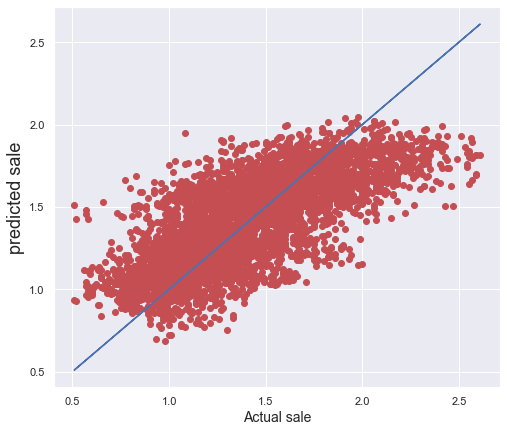

In [73]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

r2 score:  52.37767700674646  
Cross val Score 10.563224054710044  
Still diffrece is considerable, Model is not improved with Ridge,  
Lets try Decison TreeRegressor.

## 3. Decision TreeRegressor

In [74]:
parameters={'criterion':['mse','friedman_mse', 'mae', 'poisson'], 'splitter':['best', 'random'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],'max_features':['auto', 'sqrt', 'log2']}
dt=DecisionTreeRegressor()
dtclf= GridSearchCV(dt, parameters )
dtclf.fit(x_train_b, y_train_b)
print(dtclf.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 11, 'max_features': 'auto', 'splitter': 'best'}


In [84]:
dt=DecisionTreeRegressor(criterion='friedman_mse',max_depth=11, max_features='auto',splitter='best' )
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=5)
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 70.94113992351035
Cross Val Score: -18.528405761113714


In [85]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 0.15053378984105537
Mean Squared Error: 0.04291331315679602
Root Mean Square Error: 0.20715528754245213


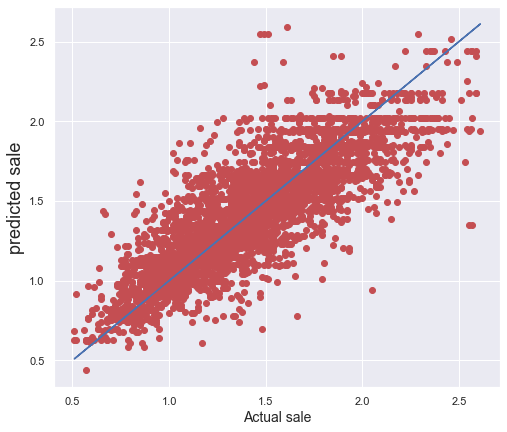

In [86]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 Score: 70.70500052981143  
Cross Val Score: -18.137344458717337  
We can see diffrence is still very high, lets try anaother Model.

# 4. KNeighborsRegressor

In [87]:
parameters={'n_neighbors':[1,2,3,5,6,7,8,9,10,15],'weights':['uniform', 'distance'], 'algorithm':['auto','ball_tree','kd_tree'],'leaf_size':[10,20,30,40,50] }
kn=KNeighborsRegressor()
knclf=GridSearchCV(kn,parameters)
knclf.fit(x_train_b, y_train_b)
print(knclf.best_params_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}


In [88]:
kn=KNeighborsRegressor(algorithm='auto',leaf_size=10, n_neighbors=5, weights='distance')
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score: 0', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=5, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 0 80.96392940844818
Cross val Score : 5.668754515562446


In [89]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 0.12159267239718105
Mean Squared Error: 0.028111937509588
Root Mean Square Error: 0.16766614896748835


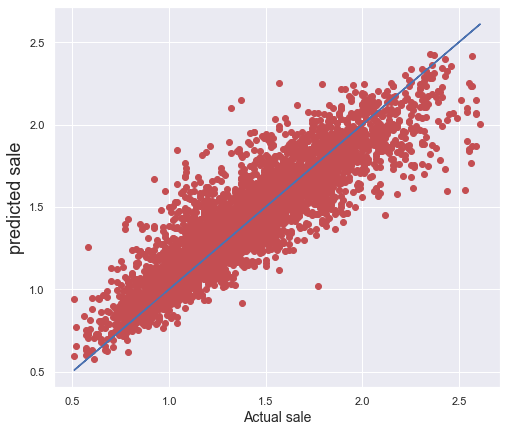

In [90]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 Score: 0 80.96392940844818  
Cross val Score : 5.668754515562446  
Model performance is very poor as compared to basi models .  
Lets try Ensemble Techniques.

# 5. Ensemble Techniques

In [69]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[10,20,30,70, 100], 'min_samples_split':[1,2,3,4,10]}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}


In [70]:
rf=RandomForestRegressor(criterion='mse', max_features='auto', min_samples_split=2, n_estimators=100)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=5, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 86.55541757952659
Cross val Score : 28.25658329926185


In [71]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 0.10200042850699141
Mean Squared Error: 0.01985458390843482
Root Mean Square Error: 0.1409062947793136


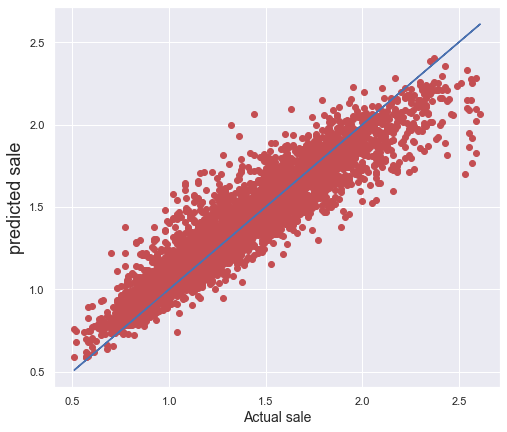

In [72]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

R2 score: 86.55541757952659  
Cross val Score : 28.25658329926185  

Here we can see CV score diffrence is very low as compare to athor model, But slill , model performance is low.  
Lets try GradiantBoosting.  
    

## 7. GradientBoostingRegressor

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['lad', 'huber'],'criterion':['friedman_mse', 'mae'], 'learning_rate':[0.001,0.01,0.1], 'n_estimators':[10,20,100]}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, param_grid=parameters, n_jobs=-1)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}


In [74]:
gb=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='huber', n_estimators= 100)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=5, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 86.55541757952659
Cross val Score : 22.75572099530065


R2 score: 86.55541757952659  
Cross val Score : 22.75572099530065  

Here CV score diffrence is more as compare to RandomForestRegressor.  
We can consider RandomForestRegressor as best modle.

# We can see RandomForestRegressor Having  very less diffrence in R2 score and Cross Val Score. we can consider this our best model.

### Saving Best Model 

In [79]:
import pickle
filename='Avocado_Sales_Prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

In [80]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,0.98,0.9501
1,1.23,1.2394
2,0.94,1.0815
3,1.01,1.0393
4,1.83,1.8572
...,...,...
4429,1.49,1.7759
4430,1.33,1.2154
4431,1.16,1.5140
4432,1.30,1.5730


# Prediction on the basis of Region Column 

In [89]:
df_copy= df.copy()

Lets drop Total Volume, As we have seen it is having multicolinearity.

In [91]:
df_copy.head(3)

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0,2015,0,12,13


In [103]:
df_copy.shape

(17736, 12)

In [92]:
df_copy.drop('Total Volume', axis= 1, inplace= True)

### Removing Skewness

In [97]:
#Dividing into feature and vector data.
x_c=df_copy.drop(['region'], axis=1)
y_c=df_copy['region']


In [123]:
x_c.columns

Index(['AveragePrice', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'type', 'year', 'Month', 'Day'],
      dtype='object')

In [100]:
x=power_transform(x_c,method='yeo-johnson')

### Data Scaling

In [113]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)

In [126]:
x2=pd.DataFrame(data= x1, columns= ['AveragePrice', 'PLU_4046', 'PLU_4225', 'PLU_4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'type', 'year', 'Month', 'Day'])

In [127]:
x2

,AveragePrice,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
0,-0.192949,-0.353667,-0.285649,-0.325228,-0.427570,-0.397509,-0.381335,-1.014082,-1.213193,1.646455,1.289917
1,-0.141047,-0.354462,-0.309571,-0.324945,-0.424862,-0.394232,-0.381278,-1.014082,-1.213193,1.646455,0.491890
2,-1.230992,-0.354198,-0.152355,-0.322935,-0.429418,-0.399795,-0.381202,-1.014082,-1.213193,1.646455,-0.306138
3,-0.841726,-0.353458,-0.242948,-0.324548,-0.437236,-0.409427,-0.380790,-1.014082,-1.213193,1.646455,-1.104166
4,-0.322704,-0.353876,-0.311522,-0.324459,-0.435987,-0.408169,-0.379931,-1.014082,-1.213193,1.363733,1.517925
...,...,...,...,...,...,...,...,...,...,...,...
17731,0.585583,-0.351452,-0.414631,-0.326570,-0.411488,-0.379330,-0.376785,0.986114,1.974697,-1.180767,-1.332174
17732,0.793192,-0.353328,-0.409995,-0.326570,-0.425668,-0.396139,-0.378223,0.986114,1.974697,-1.463489,1.403921
17733,1.208409,-0.353327,-0.412380,-0.306291,-0.425235,-0.394461,-0.382019,0.986114,1.974697,-1.463489,0.605894
17734,1.364116,-0.352591,-0.411093,-0.306317,-0.419959,-0.388076,-0.381916,0.986114,1.974697,-1.463489,-0.192134


In [106]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [128]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [129]:
calc_vif(x2)

,variables,VIF FACTOR
0,AveragePrice,1.794395
1,PLU_4046,2.398716
2,PLU_4225,3.226086
3,PLU_4770,1.948814
4,Total Bags,3364.505561
5,Small Bags,2373.909435
6,Large Bags,207.416432
7,type,1.836867
8,year,1.161373
9,Month,1.094544


VIF for total columns is Total Bags, Small Bags and Large bags is very high.   
lets remove one by one.

In [131]:
x2.drop(['Total Bags'], axis=1 , inplace= True)

In [132]:
calc_vif(x2)

,variables,VIF FACTOR
0,AveragePrice,1.786580
1,PLU_4046,2.398503
2,PLU_4225,3.057256
3,PLU_4770,1.783541
4,Small Bags,4.038980
5,Large Bags,1.634937
6,type,1.830263
7,year,1.153814
8,Month,1.094225
9,Day,1.002008


Now We have removed multicollinearity.

Since our Target is having only two values "0" and "1", we will use binary classification model.

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

## Chosing Best Random State

In [142]:
ls=LogisticRegression()
for i in range(0, 100):
    x_train, x_test, y_train, y_test= train_test_split(x2,y_c,random_state= i,test_size=0.20)
    ls.fit(x_train,y_train)
    pred_train= ls.predict(x_train)
    pred_test= ls.predict(x_test)
    print(f"At Random Stat {i}, the training accuracy is:{accuracy_score(y_train,pred_train)}")
    print(f"At Random Stat {i}, the testing accuracy is:{accuracy_score(y_test,pred_test)}")
    print("\n")

At Random Stat 0, the training accuracy is:0.40696363123766566
At Random Stat 0, the testing accuracy is:0.3813416009019166


At Random Stat 1, the training accuracy is:0.40217084860445446
At Random Stat 1, the testing accuracy is:0.3928974069898534


At Random Stat 2, the training accuracy is:0.4078094164082323
At Random Stat 2, the testing accuracy is:0.3858511837655017


At Random Stat 3, the training accuracy is:0.40710459543276006
At Random Stat 3, the testing accuracy is:0.3886696730552424


At Random Stat 4, the training accuracy is:0.407386523822949
At Random Stat 4, the testing accuracy is:0.3920518602029312


At Random Stat 5, the training accuracy is:0.4085142373837045
At Random Stat 5, the testing accuracy is:0.38246899661781286


At Random Stat 6, the training accuracy is:0.40632929235974063
At Random Stat 6, the testing accuracy is:0.395152198421646


At Random Stat 7, the training accuracy is:0.4085142373837045
At Random Stat 7, the testing accuracy is:0.3979706877113867

At Random Stat 27  
the training accuracy is:0.4041443473357767  
the testing accuracy is:0.4038895152198422  


In [145]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x2,y_c,random_state=27,test_size=0.20)

In [146]:
ls.fit(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)
print(accuracy_score(y_test_b,ls_pred))

0.4038895152198422


In [147]:
from sklearn.metrics import classification_report 
print(classification_report(y_test_b, ls_pred))

              precision    recall  f1-score   support

           0       0.80      0.40      0.53        88
           1       0.17      0.30      0.22        69
           2       0.71      0.56      0.63        71
           3       0.24      0.50      0.33        66
           4       0.42      0.34      0.38        61
           5       0.42      0.31      0.36        68
           6       0.74      0.67      0.70        63
           7       0.33      0.33      0.33        54
           8       0.62      0.51      0.56        74
           9       0.41      0.45      0.43        65
          10       0.21      0.12      0.15        69
          11       0.34      0.39      0.36        74
          12       0.60      0.44      0.51        66
          13       0.36      0.37      0.36        67
          14       0.16      0.21      0.18        63
          15       0.61      0.66      0.63        67
          16       0.75      0.41      0.53        73
          17       0.21    

## Cross Validation of the model

In [150]:
ls_pred=ls.predict(x_test_b)
from sklearn.model_selection import cross_val_score
ls_score=accuracy_score(y_test_b,ls_pred)
for j in range(2,10):
    ls_cv= cross_val_score(ls,x2,y_c,cv=j)
    ls_cvscore=ls_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",ls_cvscore*100)
    print("Accuracy Score:-", ls_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 6.376860622462788
Accuracy Score:- 40.38895152198422


at cv:- 3
Cross Validation scre is:- 24.543301759133964
Accuracy Score:- 40.38895152198422


at cv:- 4
Cross Validation scre is:- 26.967749210645014
Accuracy Score:- 40.38895152198422


at cv:- 5
Cross Validation scre is:- 31.49457486501923
Accuracy Score:- 40.38895152198422


at cv:- 6
Cross Validation scre is:- 29.91091565178169
Accuracy Score:- 40.38895152198422


at cv:- 7
Cross Validation scre is:- 33.68579067950366
Accuracy Score:- 40.38895152198422


at cv:- 8
Cross Validation scre is:- 33.993008570139835
Accuracy Score:- 40.38895152198422


at cv:- 9
Cross Validation scre is:- 34.29893638239527
Accuracy Score:- 40.38895152198422




at cv:- 9
Cross Validation scre is:- 34.29893638239527  
Accuracy Score:- 40.38895152198422

We will select cv=9, because diffrence in Cross Validation scre and Accuracy Score is less.

In [152]:
ls_cv_selected= cross_val_score(lr,x2,y_c,cv=9).mean()
print("The cross Val Score is: ",ls_cv_selected, "\n The Accuracy score is: ",ls_score)

The cross Val Score is:  0.3429893638239527 
 The Accuracy score is:  0.4038895152198422


In [ ]:
very big diffrence in Model performance is very low

# 1.SVC

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters= {'kernel':[ 'poly', 'rbf', 'sigmoid'], 'random_state': list(range(0,5)), 'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr']}
svc=SVC()
clf=GridSearchCV(svc, param_grid=parameters, n_jobs=-1)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 0}


In [159]:
scv=SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', random_state=0)
svc.fit(x_train_b, y_train_b)
svc.score(x_train_b, y_train_b)
svc_pred=svc.predict(x_test_b)

svc_d=accuracy_score(y_test_b, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x2,y_c,cv=9)
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 35.93573844419391
Cross val Score : 30.871377214391533


In [160]:
print(confusion_matrix(y_test_b, svc_pred))
print(classification_report(y_test_b, svc_pred))

[[ 1  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 35 ...  0  0  0]
 ...
 [ 0  0  0 ... 25  1  0]
 [ 0  0  0 ...  0 44  0]
 [ 0  2  0 ...  0  0 31]]
              precision    recall  f1-score   support

           0       0.33      0.01      0.02        88
           1       0.55      0.39      0.46        69
           2       0.90      0.49      0.64        71
           3       0.53      0.12      0.20        66
           4       0.19      0.49      0.27        61
           5       0.08      0.19      0.11        68
           6       0.95      0.60      0.74        63
           7       0.21      0.22      0.21        54
           8       0.58      0.53      0.55        74
           9       0.83      0.38      0.53        65
          10       0.34      0.16      0.22        69
          11       0.30      0.42      0.35        74
          12       0.83      0.45      0.59        66
          13       0.77      0.36      0.49        67
          14       0.60      0.14

Accuracy_core: 35.93573844419391  
Cross val Score : 30.871377214391533  

Differnce in Cross val score is less, but still model having less accuarcy and poor performance. 

## Ensemble Techniques

In [161]:
from sklearn.neighbors import KNeighborsClassifier
parameters={'n_neighbors':[1,2,3,5],'weights':['uniform', 'distance'], 'algorithm':['ball_tree','kd_tree',], 'leaf_size':[10,20,30,40]}
kn=KNeighborsClassifier()
knclf=GridSearchCV(kn,parameters)
knclf.fit(x_train_b, y_train_b)
print(knclf.best_params_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}


In [162]:
kn=KNeighborsClassifier(algorithm='ball_tree',leaf_size=10,  n_neighbors=5, weights='uniform')
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= accuracy_score(y_test_b, kn_pred)
print('accuracy_score: 0', kn_score*100)

kncvscore=cross_val_score(kn,x2,y_c, cv=9)
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 0 21.279594137542276
Cross val Score : 20.76868685047687


In [163]:
print(confusion_matrix(y_test_b, kn_pred))
print(classification_report(y_test_b, kn_pred))

[[ 9  3  7 ...  0  0  0]
 [ 4 25  3 ...  0  0  1]
 [ 2  5 33 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  1  0]
 [ 0  1  0 ...  0 27  0]
 [ 3  9  3 ...  0  0 15]]
              precision    recall  f1-score   support

           0       0.03      0.10      0.05        88
           1       0.11      0.36      0.16        69
           2       0.16      0.46      0.24        71
           3       0.03      0.11      0.05        66
           4       0.10      0.26      0.14        61
           5       0.06      0.16      0.08        68
           6       0.44      0.52      0.48        63
           7       0.05      0.13      0.07        54
           8       0.38      0.53      0.44        74
           9       0.15      0.29      0.20        65
          10       0.02      0.06      0.03        69
          11       0.29      0.36      0.32        74
          12       0.38      0.38      0.38        66
          13       0.17      0.24      0.20        67
          14       0.13      0.14

## RandomForestClassifier

In [164]:
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [50,100,150,200],'criterion':['gini', 'entropy'],'max_features':['sqrt', 'log2'], 'random_state':[10,20,30,40]}
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 20}


In [165]:
rf=RandomForestClassifier(criterion='entropy', max_features='sqrt', n_estimators=200, random_state=20)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= accuracy_score(y_test_b, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x2,y_c, cv=9)
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  91.26268320180382
Cross val Score : 76.48748362823261


In [166]:
print(confusion_matrix(y_test_b, rf_pred))
print(classification_report(y_test_b, rf_pred))

[[82  0  0 ...  0  0  0]
 [ 0 60  0 ...  0  0  0]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  0  0 ...  0 48  0]
 [ 0  0  0 ...  0  0 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        88
           1       0.82      0.87      0.85        69
           2       1.00      1.00      1.00        71
           3       0.94      0.89      0.91        66
           4       0.92      0.98      0.95        61
           5       0.89      0.84      0.86        68
           6       0.95      0.97      0.96        63
           7       0.91      0.93      0.92        54
           8       1.00      0.97      0.99        74
           9       0.86      0.97      0.91        65
          10       0.82      0.87      0.85        69
          11       0.91      0.93      0.92        74
          12       0.98      0.89      0.94        66
          13       0.95      0.82      0.88        67
          14       0.92      0.97

accuracy_score:  91.26268320180382  
Cross val Score : 76.48748362823261   

model accuray and cross val score is good, but there is big diffrence in both, Model performance is poor.  

## AdaBoostClassifier

In [171]:
from sklearn.ensemble import AdaBoostClassifier
parameters={'n_estimators':[20,30,40,100],'learning_rate':[0.0001,0.001,0.01],'algorithm':['SAMME', 'SAMME.R'],'random_state':[10,20,30,40]}
ad=AdaBoostClassifier()
adclf=GridSearchCV(ad, param_grid=parameters, n_jobs=-1)
adclf.fit(x_train_b, y_train_b)
print(adclf.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 30, 'random_state': 10}


In [172]:
ad=AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 0.01, n_estimators= 30, random_state=10)
ad.fit(x_train_b, y_train_b)
ad.score(x_train_b,y_train_b)
ad_pred=ad.predict(x_test_b)

ad_score= accuracy_score(y_test_b, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x2,y_c, cv=9)
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  12.908680947012401
Cross val Score : 8.992432001185833


In [173]:
print(confusion_matrix(y_test_b, ad_pred))
print(classification_report(y_test_b, ad_pred))

[[ 0  0  0 ...  0  0  0]
 [ 0 13  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.15      0.19      0.17        69
           2       0.19      0.46      0.27        71
           3       0.43      0.09      0.15        66
           4       0.00      0.00      0.00        61
           5       0.13      0.32      0.19        68
           6       0.00      0.00      0.00        63
           7       0.11      0.83      0.19        54
           8       0.00      0.00      0.00        74
           9       0.10      0.48      0.16        65
          10       0.06      0.01      0.02        69
          11       0.00      0.00      0.00        74
          12       0.16      0.38      0.23        66
          13       0.00      0.00      0.00        67
          14       0.11      0.29

AdaBoostClassifier Classifier is not performing well lets try Decision Tree classifier.

## DecisionTreeClassifier

In [174]:
from sklearn.tree import DecisionTreeClassifier
parameters= {'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto','sqrt','log2'], 'min_samples_leaf':[1,2,3,4,5]}
dt=DecisionTreeClassifier()
dtclf=GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dtclf.fit (x_train_b, y_train_b)
print(dtclf.best_params_)                                    

{'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 1, 'splitter': 'best'}


In [176]:
dt=DecisionTreeClassifier(criterion='entropy', max_features='auto', splitter= 'best', min_samples_leaf=1)
dt.fit(x_train_b,y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score= accuracy_score(y_test_b, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x2,y_c,cv=9)
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )
 

accuracy_score 75.19729425028186
Cross val score is: 53.63012697080024


In [177]:
print(confusion_matrix(y_test_b, dt_pred))
print(classification_report(y_test_b, dt_pred))

[[65  0  0 ...  0  0  0]
 [ 0 48  0 ...  1  0  3]
 [ 0  0 59 ...  0  0  0]
 ...
 [ 0  0  0 ... 25  0  0]
 [ 0  0  0 ...  0 41  0]
 [ 0  1  1 ...  0  0 42]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        88
           1       0.64      0.70      0.67        69
           2       0.84      0.83      0.84        71
           3       0.74      0.80      0.77        66
           4       0.79      0.82      0.81        61
           5       0.61      0.72      0.66        68
           6       0.83      0.79      0.81        63
           7       0.70      0.74      0.72        54
           8       0.94      0.92      0.93        74
           9       0.71      0.85      0.77        65
          10       0.70      0.64      0.67        69
          11       0.82      0.89      0.86        74
          12       0.87      0.68      0.76        66
          13       0.70      0.69      0.69        67
          14       0.78      0.75

Decision Tree classifier is also not performing well, We will now use another model. 

# GaussianNB

In [180]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b, y_train_b)
gb_pred=gb.predict(x_test_b)

gb_score=accuracy_score(y_test_b, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x2,y_c,cv=9)
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 33.22998872604284
Cross Val Score is : 27.668305488809402


In [181]:
print(confusion_matrix(y_test_b, gb_pred))
print(classification_report(y_test_b, gb_pred))

[[26  0  0 ...  0  0  0]
 [ 1 22  0 ...  0  0  5]
 [ 7  0 38 ...  0  0  0]
 ...
 [ 0  0  0 ... 26  0  0]
 [ 0  2  0 ...  9 11  0]
 [ 3  0  0 ...  0  0  8]]
              precision    recall  f1-score   support

           0       0.12      0.30      0.17        88
           1       0.39      0.32      0.35        69
           2       0.83      0.54      0.65        71
           3       0.97      0.48      0.65        66
           4       0.66      0.38      0.48        61
           5       0.31      0.32      0.32        68
           6       0.67      0.44      0.53        63
           7       0.67      0.15      0.24        54
           8       0.87      0.53      0.66        74
           9       0.69      0.31      0.43        65
          10       0.42      0.12      0.18        69
          11       0.45      0.20      0.28        74
          12       0.75      0.41      0.53        66
          13       0.65      0.30      0.41        67
          14       0.86      0.40

Here Knn showing very less diffrence in cv score and accuracy score , So our best model is KNN.

In [193]:
kn_pred_prob=kn.predict_proba(x_test_b)

In [194]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_b, kn_pred_prob, multi_class='ovr')

0.6604063865885828

# Saving Best Model

In [195]:
import pickle
filename="Evaluation_Project_Avacado_price_logistic.pkl "
pickle.dump(kn, open(filename,'wb'))

In [196]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(kn.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,33,27
1,22,11
2,39,0
3,9,10
4,34,4
...,...,...
3543,28,2
3544,43,9
3545,33,5
3546,53,20


At the end we can see that the Original and Predicted output.